## Business Understanding:
It is the dataset of Germany, France and Spain bank customers for getting the information that , this particular customer will leave bank or not.
## Objectives
We aim to accomplist the following for this study:

Identify and visualize which factors contribute to customer churn:

Build a prediction model that will perform the following:

Classify if a customer is going to churn or not
Preferably and based on model performance, choose a model that will attach a probability to the churn to make it easier for customer service to target low hanging fruits in their efforts to prevent churn

## COLUMNS DESCRIPTION
#### RowNumber:
This is an index column that assigns a unique identifier to each row in the dataset. It is useful for tracking and referencing specific data points.
#### CustomerId:
This column contains unique identifiers for each customer in the bank's database. It allows for linking customer information across different datasets and enables individual customer analysis.
#### Surname:
This column stores the last names of the bank's customers. It is useful for demographic analysis and customer identification.
#### CreditScore:
This column indicates the creditworthiness of each customer, typically ranging from 300 to 850. A higher credit score suggests a lower risk of default and better financial management.
#### Geography:
This column categorizes customers based on their geographical location, such as country, region, or city. It is useful for understanding regional trends and tailoring marketing strategies to specific areas.
#### Gender:
This column indicates the gender of each customer, typically coded as 'M' for male or 'F' for female. It is relevant for analyzing gender-based spending patterns and preferences.
#### Age:
This column represents the age of each customer, typically measured in years. It is crucial for understanding customer demographics, life stages, and potential financial needs.
#### Tenure:
This column indicates the length of time a customer has been with the bank, typically measured in months or years. It is a valuable metric for assessing customer loyalty and predicting potential churn.
#### Balance:
This column represents the current account balance of each customer. It provides insights into financial stability, spending habits, and potential investment opportunities.
#### NumOfProducts:
This column indicates the number of products or services each customer has with the bank, such as checking accounts, savings accounts, credit cards, or loans. It reflects customer engagement and potential cross-selling opportunities.
#### HasCrCard:
This column is a binary variable indicating whether or not a customer has a credit card with the bank. It is useful for analyzing creditworthiness, spending patterns, and risk management.
#### IsActiveMember:
This column indicates whether or not a customer is actively using the bank's services. It is crucial for identifying potential churn risks and targeting retention campaigns.
#### EstimatedSalary:
This column represents an estimate of each customer's annual salary, typically derived from financial data or demographic information. It provides insights into customer income levels, affordability, and potential product preferences.
#### Exited:
This column is a binary variable indicating whether or not a customer has left the bank, typically coded as '1' for churned customers and '0' for active customers. It is the target variable for customer segmentation and churn prediction models.



 IMPORT LIBRARIES

In [1]:
#import packages
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import  classification_report, accuracy_score, precision_score, recall_score,f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,plot_confusion_matrix 
import json
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

%matplotlib inline
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')
print('Load Libraries-Done')

Load Libraries-Done


### Read the data

In [2]:
data = pd.read_csv("Churn_Modelling.csv")
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
df=data

## data understandng

In [57]:
#gettng to know the data we aredealing with
print("="*50)
print("First Five rows ","\n")
print(data.head(5),"\n")

print("="*50)
print("Information About Dataset","\n")
print(data.info(),"\n")

print("="*50)
print("Describe the Dataset","\n")
print(data.describe().T,"\n")

print("="*50)
print("Null Values t ","\n")
print(data.isnull().sum(),"\n")

print("="*50)
print(" Shape of the Dataset","\n")
print(data.shape,"\n")


First Five rows  

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63     

## Data preparation

In [5]:
#fix spaces and column names
data.columns= data.columns.str.strip()
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [6]:
# Get unique count for each variable
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [7]:
# Check variable data types
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [8]:
# Function to check for duplicate columns
def check_duplicate_columns(df):
    # Extract column names
    columns = df.columns.tolist()
    
    # Check for duplicate columns
    duplicate_columns = set(column for column in columns if columns.count(column) > 1)
    
    return list(duplicate_columns)

# Check for duplicate columns in the DataFrame
duplicate_columns_list = check_duplicate_columns(df)

# Print the result
if duplicate_columns_list:
    print("Duplicate columns found:", duplicate_columns_list)
else:
    print("No duplicate columns found.")


No duplicate columns found.


In [9]:
#do away with the unnecessary columns 'RowNumber', 'CustomerId', 'Surname'
df=df[['CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited']].copy()
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [10]:
# showing the unique values in geography
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [11]:
#showing the value count in Gender
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

## Feature understanding

<AxesSubplot:xlabel='CreditScore', ylabel='Count'>

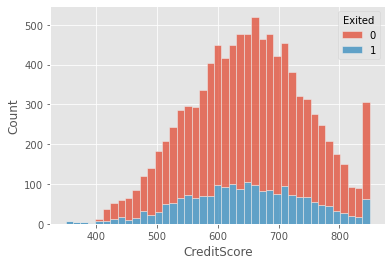

In [12]:
#visualization to show distibution
sns.histplot(data=df, x="CreditScore", hue="Exited", multiple="stack")

The credit score has normal distribution in both genders, with more males having a high creit score. with the average credit score being around 650 in both genders.

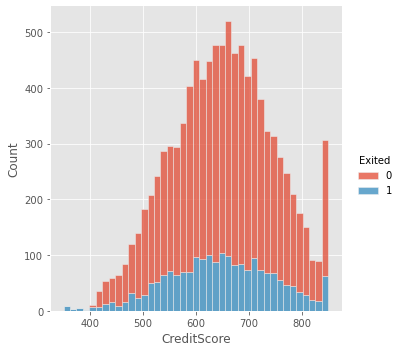

In [13]:
sns.displot(data=data, x="CreditScore", hue="Exited", multiple="stack")

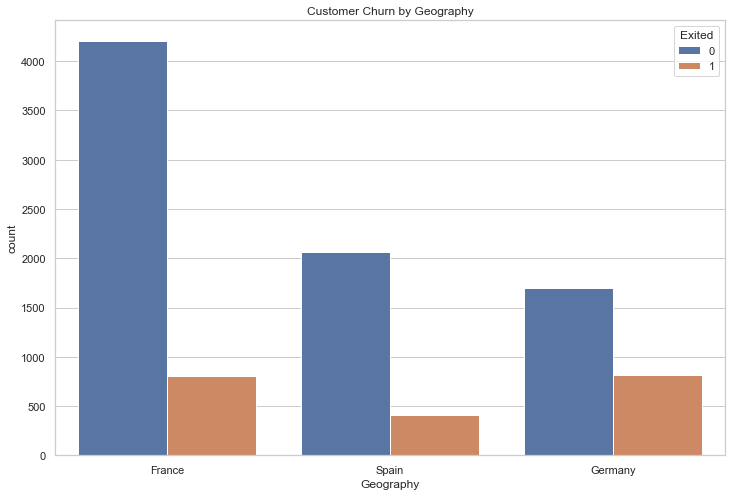

In [14]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

# Example for 'Geography'
sns.countplot(x='Geography', hue='Exited', data=df)
plt.title('Customer Churn by Geography')
plt.show()

Generally the number of retained customers in all countries is much higher than the ones that exited.

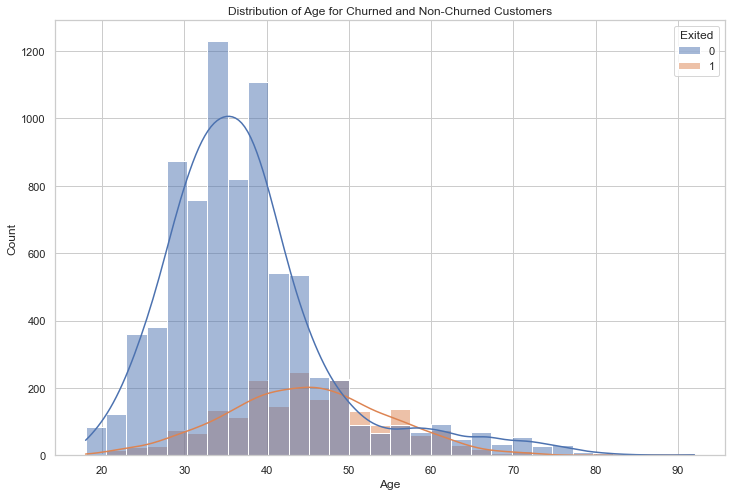

In [15]:
plt.figure(figsize=(12, 8))

# Example for 'Age'
sns.histplot(data=df, x='Age', hue='Exited', kde=True, bins=30)
plt.title('Distribution of Age for Churned and Non-Churned Customers')
plt.show()


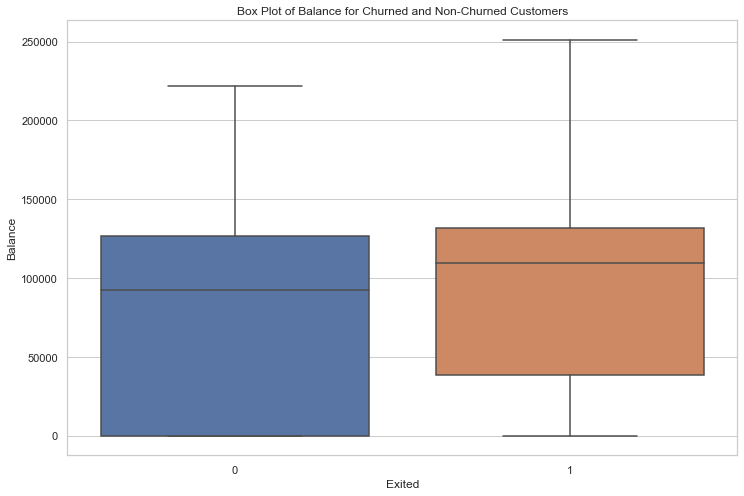

In [16]:
plt.figure(figsize=(12, 8))

# Example for 'Balance'
sns.boxplot(x='Exited', y='Balance', data=df)
plt.title('Box Plot of Balance for Churned and Non-Churned Customers')
plt.show()


Balance has no outliers in either the customers retained or exited

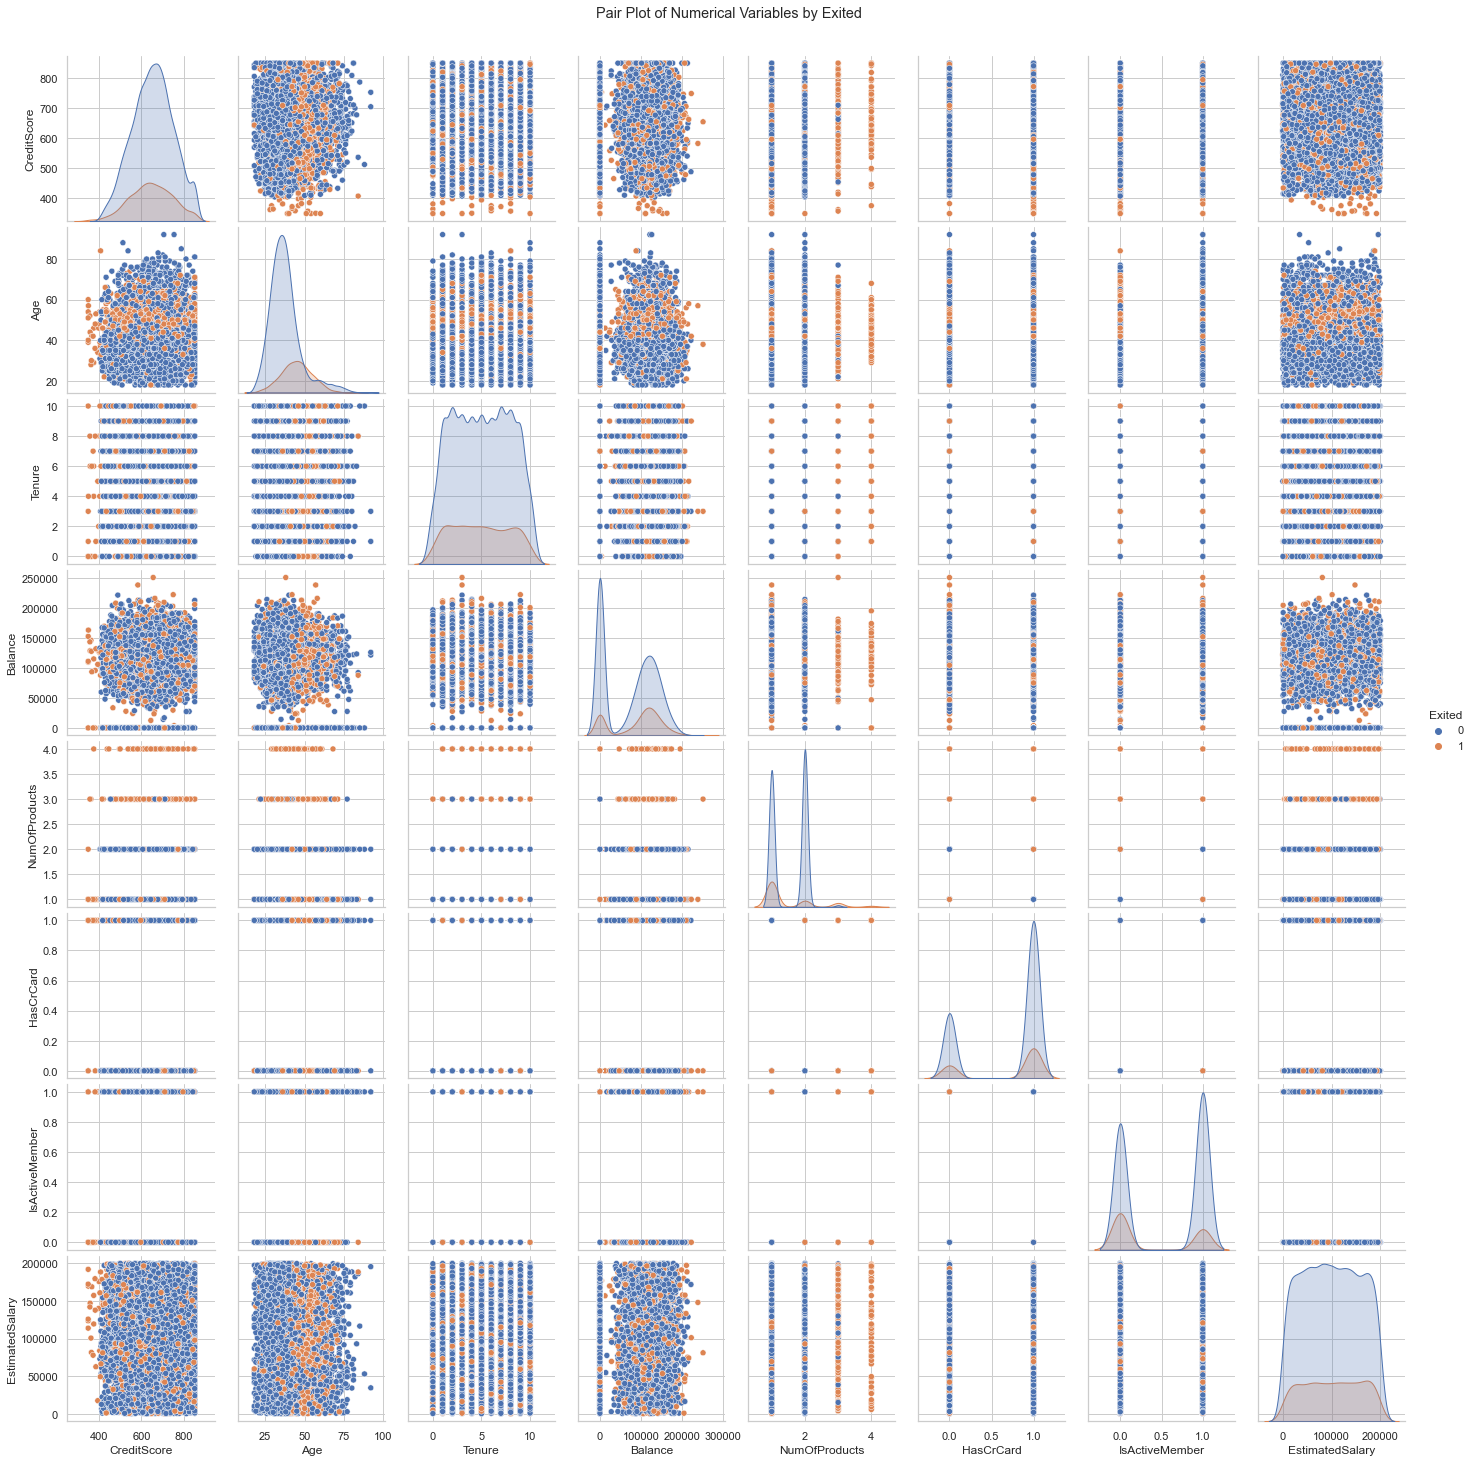

In [17]:
sns.pairplot(df, hue='Exited', diag_kind='kde')
plt.suptitle('Pair Plot of Numerical Variables by Exited', y=1.02)
plt.show()


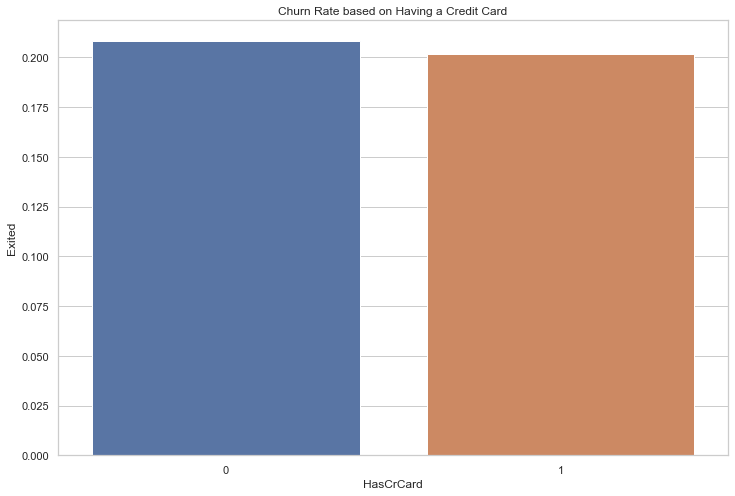

In [18]:
plt.figure(figsize=(12, 8))

# Example for 'HasCrCard'
sns.barplot(x='HasCrCard', y='Exited', data=df, ci=None)
plt.title('Churn Rate based on Having a Credit Card')
plt.show()


In [19]:
# Fuction to get the value counts of the data in the columns
def get_value_counts(df, col):
    ''' Returns the value counts of a column in a dataframe '''
    counts = df[col].value_counts(dropna=False, ascending=False)
    return counts

# Function to visualise the value counts in the columns
def plot_data(df, col, title):
    
    fig, ax = plt.subplots(figsize=(10, 5))
    
    ''' Plots the value counts of the categories of a column in a dataframe as a bar chart '''
    
    get_value_counts(df, col).plot(kind='bar', figsize=(15, 5), color='#037bfc', edgecolor='black', fontsize=10)
    plt.title(title)
    plt.xticks(rotation=90)
    plt.ylabel('Count', fontsize=10)

Male      5457
Female    4543
Name: Gender, dtype: int64


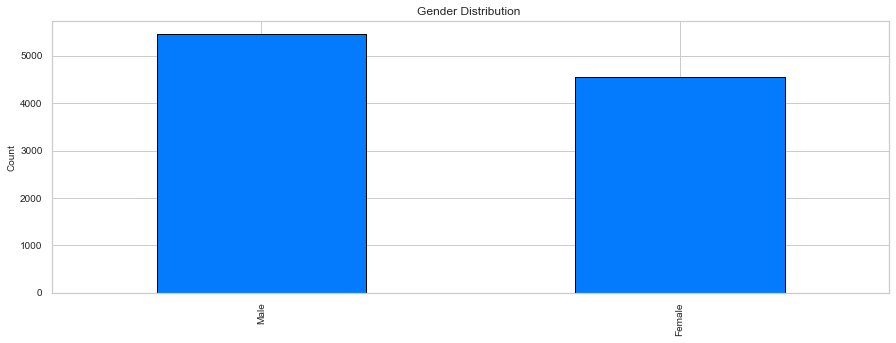

In [20]:
#Getting the value counts for the gender columns
print(get_value_counts(df, "Gender"))

#Visualizing the gender distribution
plot_data(df, "Gender", "Gender Distribution ")

In [21]:
# function to plot kde plots
def plot(df,col, y = 0):
    facet= sns.FacetGrid(df, aspect=3).set(title= f"KDE Plot for {col}")
    facet.map(sns.kdeplot, col ,shade= True)
    facet.set(xlim=(y, df[col].max()))
    facet.add_legend();

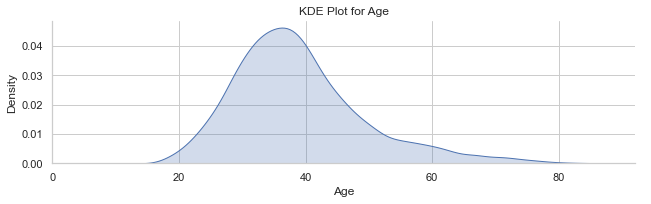

In [22]:
#Plotting the KDE Plot for Age
plot(df,'Age');

Age has normal and unimodal distribution 

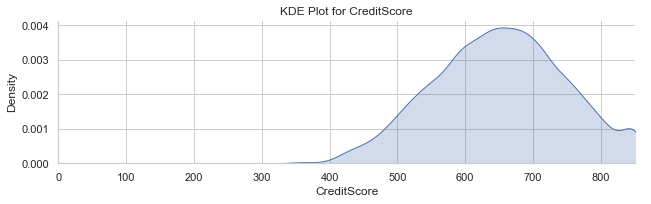

In [23]:
#plotting the KDE plot for CreditScore
plot(df,'CreditScore');

creditscore has a unimodal distribution and is right skewed(positive skewness)

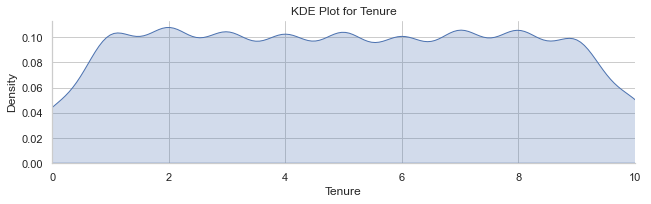

In [24]:
#plotting the KDE plot for Tenure
plot(df,'Tenure');

Tenure has a Continuous multimodal distributions

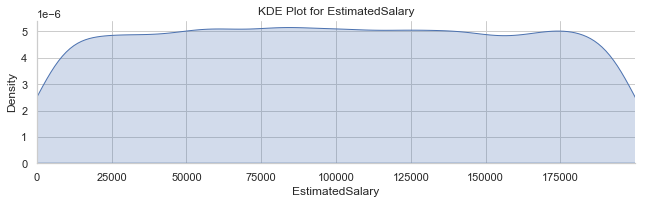

In [25]:
#plotting the KDE plot for EstimatedSalary
plot(df,'EstimatedSalary');

Estimated salary has Continuous multimodal distributions

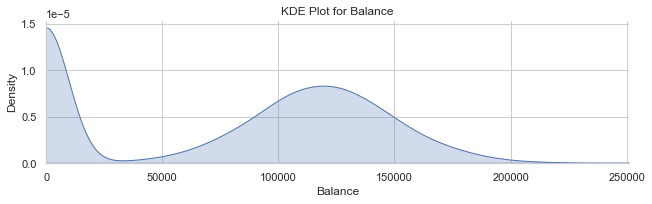

In [26]:
#plotting the KDE plot for Balance
plot(df,'Balance');

Balance has a positive skewness with a higher number of people having 0 balance in their accounts

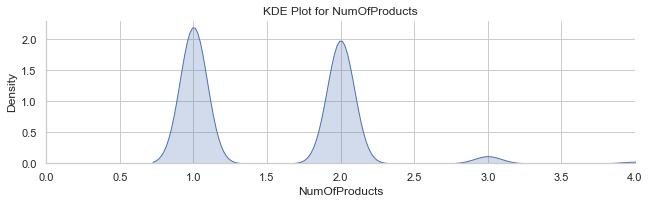

In [27]:
#plotting the KDE plot for NumOfProducts
plot(df,'NumOfProducts')

Number of products 'NumOfProducts' has a bimodal distribution.

### Bivariate analysis

#### bivariate analysis is the statistical process of used  to examine relationship between two variables

In [28]:
# function to plot side by side chart
def bivariate(name, hue):
    '''A function to visualize a countplot of different columns'''
    figure = sns.countplot(x = df[name], hue = df[hue]).set(title= "A countplot of Balance against Gender")
    
    return figure

In [29]:
#comparing columns GENDER and EstimatedSalary
#bivariate('Gender','Balance');


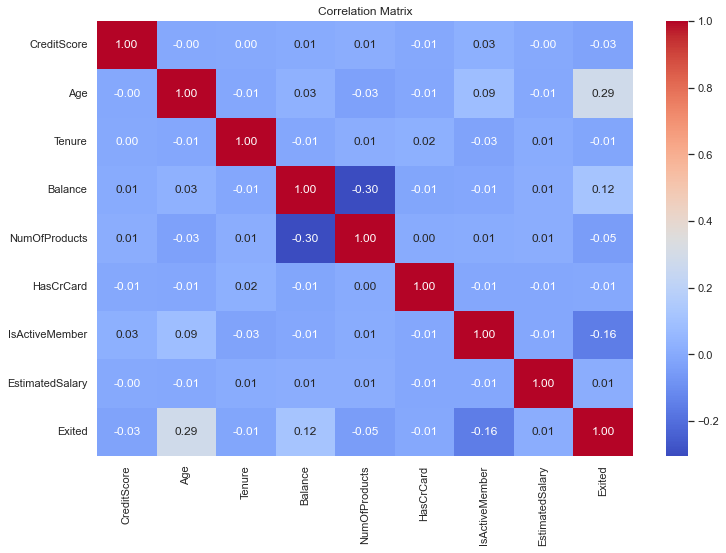

In [30]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


# FEATURE ENGINEERING

####  instantiate label encoding to make the Gender and Gography columns numerical

In [31]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
# Instantiate LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'Category' column
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Geography'] = label_encoder.fit_transform(df['Geography'])
# Display the DataFrame
df


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1


## MODELLING

In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [33]:
#Splitting the data into X and y, training (80%) and testing (20%) set
from sklearn.model_selection import train_test_split
X = df.drop("Exited", axis= 1)
y = df['Exited']

# split data into 80-20 for training set / test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 10), (2000, 10), (8000,), (2000,))

In [34]:
#normalization(make all values bet. 0-1)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_normalized_arr=scaler.transform(X_train)
X_train_normalized_df=pd.DataFrame(X_train_normalized_arr, columns=X_train.columns.to_list())

X_test_normalized_arr=scaler.transform(X_test)
X_test_normalized_df=pd.DataFrame(X_test_normalized_arr, columns=X_test.columns.to_list())

In [35]:
X_train_normalized_df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0.492,1.0,0.0,0.783784,0.9,0.534911,0.000000,1.0,1.0,0.067226
1,0.528,0.0,1.0,0.418919,0.1,0.000000,0.333333,1.0,0.0,0.962237
2,0.190,1.0,1.0,0.594595,0.1,0.255559,0.000000,1.0,1.0,0.382827
3,0.388,0.0,0.0,0.297297,0.7,0.000000,0.000000,0.0,1.0,0.805404
4,0.792,0.0,1.0,0.256757,0.2,0.000000,0.333333,1.0,0.0,0.715981
...,...,...,...,...,...,...,...,...,...,...
7995,0.248,0.0,0.0,0.162162,0.9,0.000000,0.333333,0.0,0.0,0.315763
7996,0.974,0.0,0.0,0.148649,0.9,0.000000,0.333333,1.0,1.0,0.209293
7997,0.504,1.0,1.0,0.216216,0.8,0.392122,0.000000,1.0,0.0,0.197671
7998,1.000,0.0,1.0,0.297297,0.9,0.000000,0.333333,0.0,1.0,0.596161


In [36]:
X_train= X_train_normalized_df
X_test= X_test_normalized_df

#### model selection

In [37]:
##Create a Function to Evaluate Model
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [38]:
## Beginning Model Training
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Adaboost Regressor":AdaBoostRegressor()
   
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.3750
- Mean Absolute Error: 0.2882
- R2 Score: 0.1333
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.3715
- Mean Absolute Error: 0.2866
- R2 Score: 0.1486


Lasso
Model performance for Training set
- Root Mean Squared Error: 0.4028
- Mean Absolute Error: 0.3245
- R2 Score: 0.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.4026
- Mean Absolute Error: 0.3243
- R2 Score: -0.0000


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.3750
- Mean Absolute Error: 0.2882
- R2 Score: 0.1333
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.3715
- Mean Absolute Error: 0.2867
- R2 Score: 0.1485


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 0.3018
- Mean Absolute Error: 0.1820
- R2 Score: 0.4385
----------------------

In [39]:
#Initialize few parameter for Hyperparamter tuning
knn_params = {"n_neighbors": [2, 3, 10, 20, 40, 50]}
rf_params = {"max_depth": [5, 8, 15, None, 10],
             "max_features": [5, 7, "auto", 8],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500, 1000]}

ada_params={
    "n_estimators":[50,60,70,80],
    "loss":['linear','square','exponential']
}

In [40]:
# Models list for Hyperparameter tuning
randomcv_models = [('KNN', KNeighborsRegressor(), knn_params),
                   ("RF", RandomForestRegressor(), rf_params),
                   ("Adaboost",AdaBoostRegressor(),ada_params)
                   
                   ]

In [41]:
##Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)
    random.fit(X_train, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 12 candidates, totalling 36 fits
---------------- Best Params for KNN -------------------
{'n_neighbors': 10}
---------------- Best Params for RF -------------------
{'n_estimators': 1000, 'min_samples_split': 20, 'max_features': 5, 'max_depth': 10}
---------------- Best Params for Adaboost -------------------
{'n_estimators': 70, 'loss': 'linear'}


In [42]:
# We'll use RandomForest classifier
from sklearn.tree import DecisionTreeClassifier
r_clf = RandomForestClassifier()

In [43]:
# We'll leave the hyperparameters as default to begin with...
r_clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [44]:
# Define the hyperparameters to tune
param_grid = {
    'max_depth': [None, 5, 10],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
}

# Create the RandomForestClassifier
r_clf = RandomForestClassifier(random_state = 0)
# Create the GridSearchCV object
grid_search = GridSearchCV(r_clf, param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the testing data
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Best Model Accuracy: {:.4f}".format(accuracy))

Best Model Accuracy: 0.8625


In [45]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Now, X_train and y_train are the training set, X_val and y_val are the validation set,
# and X_test and y_test are the testing set
# Make predictions on the validation set
y_pred_val = best_model.predict(X_val)

# Calculate evaluation metrics
accuracy = accuracy_score(y_val, y_pred_val)
precision = precision_score(y_val, y_pred_val, average='weighted')
recall = recall_score(y_val, y_pred_val, average='weighted')
f1 = f1_score(y_val, y_pred_val, average='weighted')

# Print the evaluation metrics
print("Validation Set Accuracy: {:.4f}".format(accuracy))
print("Validation Set Precision: {:.4f}".format(precision))
print("Validation Set Recall: {:.4f}".format(recall))
print("Validation Set F1-score: {:.4f}".format(f1))

Validation Set Accuracy: 0.2044
Validation Set Precision: 0.0418
Validation Set Recall: 0.2044
Validation Set F1-score: 0.0694


In [46]:
# Make predictions on the testing set
y_pred_test = best_model.predict(X_test)

# Calculate evaluation metrics for the testing set
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test, average='weighted')
recall = recall_score(y_test, y_pred_test, average='weighted')
f1 = f1_score(y_test, y_pred_test, average='weighted')

# Print the evaluation metrics for the testing set
print("Testing Set Accuracy: {:.4f}".format(accuracy))
print("Testing Set Precision: {:.4f}".format(precision))
print("Testing Set Recall: {:.4f}".format(recall))
print("Testing Set F1-score: {:.4f}".format(f1))

# Report the performance metrics and other relevant findings
print("Model performance on the validation set was satisfactory.")
print("Final model performance on the testing set:")
print("Accuracy: {:.4f}".format(accuracy))
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1-score: {:.4f}".format(f1))

Testing Set Accuracy: 0.1965
Testing Set Precision: 0.0386
Testing Set Recall: 0.1965
Testing Set F1-score: 0.0645
Model performance on the validation set was satisfactory.
Final model performance on the testing set:
Accuracy: 0.1965
Precision: 0.0386
Recall: 0.1965
F1-score: 0.0645


In [47]:
 #Fit the RandomForestClassifier model with training data
r_clf.fit(X_train, y_train)

# Access feature importances
ind = r_clf.feature_importances_.argsort()[::-1]
X = r_clf.feature_importances_[ind]
cols = df.columns[ind]

# Print feature importances
for i in range(len(X_test.columns)):
    print(cols[i], X[i])

Age 0.23918531622473194
EstimatedSalary 0.14701747597716722
CreditScore 0.14384905722420943
Balance 0.1381950213959603
NumOfProducts 0.13276875503975874
Tenure 0.08149650505556398
IsActiveMember 0.03956593344287182
Geography 0.03816975341980583
Gender 0.020466918789299942
HasCrCard 0.01928526343063066


In [48]:
r_clf.feature_importances_

array([0.14384906, 0.03816975, 0.02046692, 0.23918532, 0.08149651,
       0.13819502, 0.13276876, 0.01928526, 0.03956593, 0.14701748])

## FEATURE SELECTION USING RFECV

In [49]:
%%time
from sklearn.feature_selection import RFECV
from sklearn.metrics import accuracy_score

# Instantiate the best model from Step 4 (e.g.,decision trees)
best_model = RandomForestClassifier(max_depth=30, min_samples_split=10, min_samples_leaf=2)

# Create the RFECV object and fit it to the training data
selector = RFECV(best_model, step=1, cv=5, scoring='accuracy')
selector.fit(X_train, y_train)

# Get the selected features and their ranks
selected_features = X_train.columns[selector.support_]
feature_ranks = selector.ranking_

print(f"Selected features: {selected_features}")
print(f"Feature ranks: {feature_ranks}")

Selected features: Index(['CreditScore', 'Geography', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'IsActiveMember', 'EstimatedSalary'],
      dtype='object')
Feature ranks: [1 1 2 1 1 1 1 3 1 1]
CPU times: total: 1min 16s
Wall time: 1min 33s


## Remove target variable from the list of selected features if it's present

In [50]:
# Convert selected_features to a list
selected_features_list = selected_features.tolist()

# Remove target variable from the list of selected features if it's present
if 'Exited' in selected_features_list:
    selected_features_list.remove('Exited')

# Create new dataframes with only the selected features
X_train_selected = X_train[selected_features_list]
X_test_selected = X_test[selected_features_list]

In [51]:
X_train_selected

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary
2579,365,1,30,0,127760.07,1,0,81537.85
7128,553,2,38,1,181110.13,2,0,184544.59
4082,778,1,29,6,150358.97,1,0,62454.01
2550,850,0,42,0,0.00,2,0,44165.84
4926,674,1,36,6,100762.64,1,0,182156.86
...,...,...,...,...,...,...,...,...
8871,466,0,30,3,0.00,1,0,193984.60
9826,789,2,40,4,0.00,2,0,137402.27
5268,691,0,28,1,0.00,2,0,92865.41
9666,758,2,35,5,0.00,2,0,95009.60


## Train the model with the list of selected features

In [52]:
best_model=best_model.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test_selected)

# Evaluate the model using accuracy_score
from sklearn.metrics import accuracy_score

test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy with selected features: {test_accuracy}")

Test accuracy with selected features: 0.8645


In [53]:
r_clf.feature_importances_

array([0.14384906, 0.03816975, 0.02046692, 0.23918532, 0.08149651,
       0.13819502, 0.13276876, 0.01928526, 0.03956593, 0.14701748])

## Model evaluation

In [54]:
 #Make predictions on the testing set
y_pred_test = best_model.predict(X_test_selected)

# Calculate evaluation metrics for the testing set
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test, average='weighted')
recall = recall_score(y_test, y_pred_test, average='weighted')
f1 = f1_score(y_test, y_pred_test, average='weighted')

# Print the evaluation metrics for the testing set
print("Testing Set Accuracy: {:.4f}".format(accuracy))
print("Testing Set Precision: {:.4f}".format(precision))
print("Testing Set Recall: {:.4f}".format(recall))
print("Testing Set F1-score: {:.4f}".format(f1))

# Report the performance metrics and other relevant findings
print("Model performance on the validation set was satisfactory.")
print("Final model performance on the testing set:")
print("Accuracy: {:.4f}".format(accuracy))
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1-score: {:.4f}".format(f1))

#  deploy it for predictions on new, unseen data.

Testing Set Accuracy: 0.8645
Testing Set Precision: 0.8551
Testing Set Recall: 0.8645
Testing Set F1-score: 0.8507
Model performance on the validation set was satisfactory.
Final model performance on the testing set:
Accuracy: 0.8645
Precision: 0.8551
Recall: 0.8645
F1-score: 0.8507


Text(0.5, 1.0, 'Confusion Matrix')

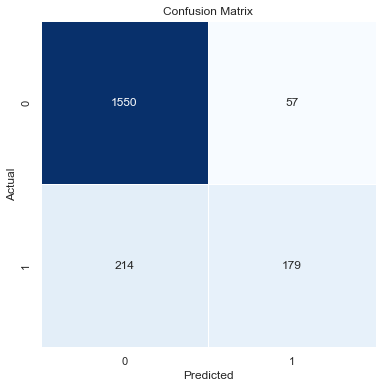

In [55]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

In [56]:
# Save the confusion matrix as an image

plt.savefig('confusion_matrix.png')

<Figure size 432x288 with 0 Axes>